# Test Utils for sBERT-RETR study
## Visualize a dissimilarity matrix
## The functionality is in the python file: dissimilarity_vis.py

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [2]:
Z = linkage(X, 'ward')
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 1.        ,  8.        ,  1.15470054,  3.        ],
       [ 9.        , 10.        ,  2.12132034,  4.        ],
       [ 3.        , 12.        ,  4.11096096,  5.        ],
       [11.        , 13.        , 14.07183949,  8.        ]])

{'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.1547005383792515, 1.1547005383792515, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.1213203435596424, 2.1213203435596424, 1.0],
  [0.0, 4.110960958218893, 4.110960958218893, 2.1213203435596424],
  [1.1547005383792515,
   14.071839491220281,
   14.071839491220281,
   4.110960958218893]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [12.5, 12.5, 47.5, 47.5]],
 'ivl': ['1', '5', '6', '3', '2', '7', '0', '4'],
 'leaves': [1, 5, 6, 3, 2, 7, 0, 4]}

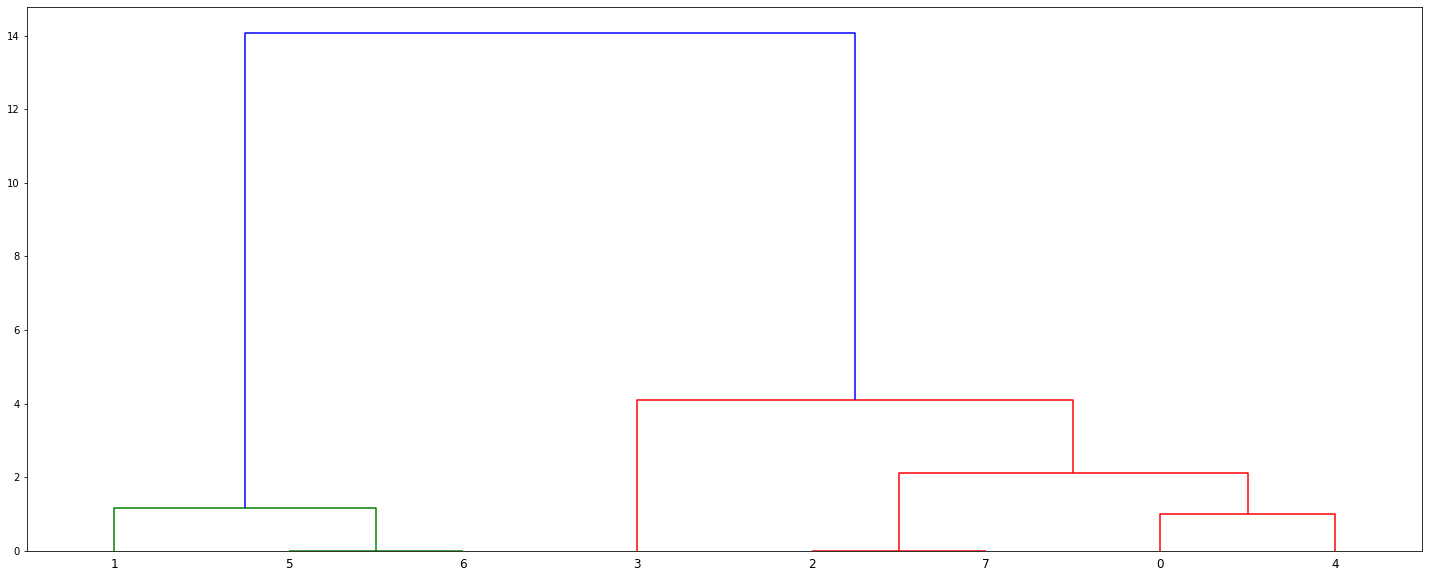

In [3]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
dn


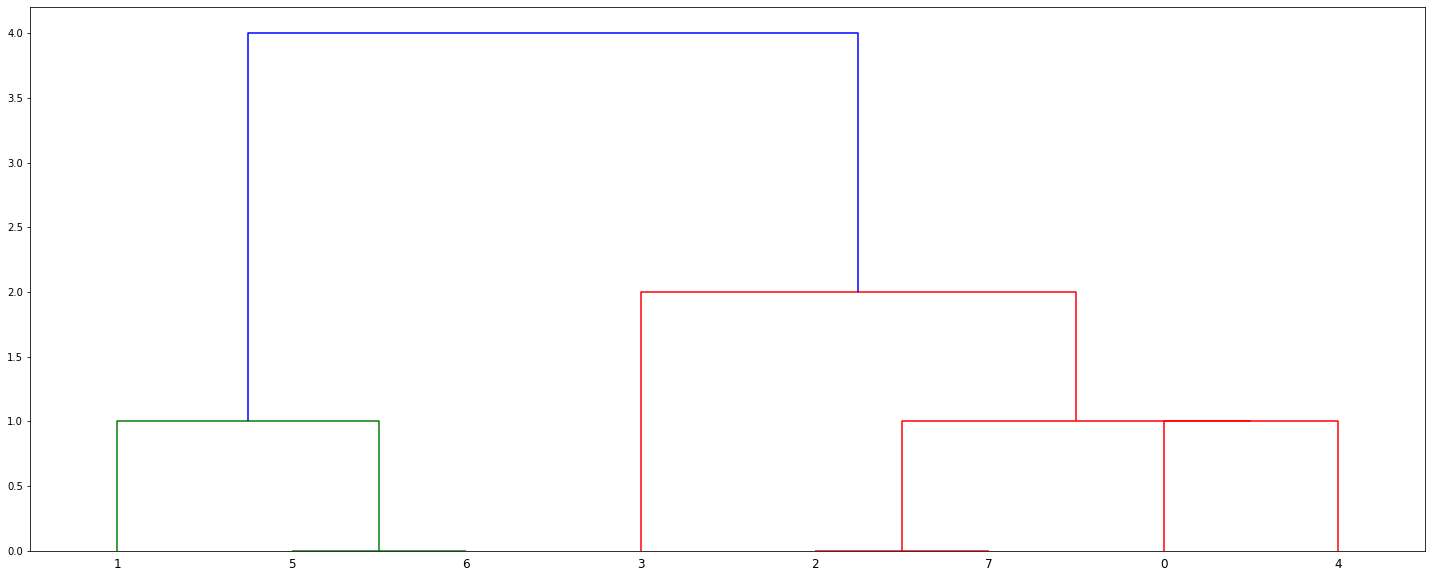

In [4]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from scipy.cluster.hierarchy import linkage

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/RTER')

In [3]:
import dissimilarity_vis as ds

In [4]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

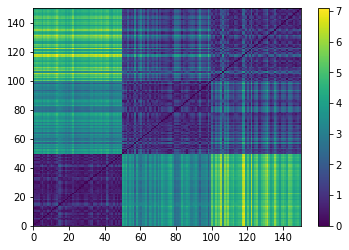

In [5]:
dist_mat = squareform(pdist(iris.data))

N = len(iris.data)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

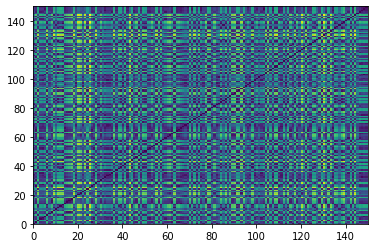

In [6]:
X = iris.data[np.random.permutation(N),:]

dist_mat = squareform(pdist(X))

plt.pcolormesh(dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Method:	 ward


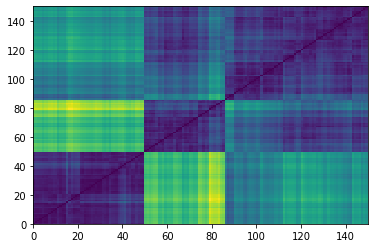

Method:	 single


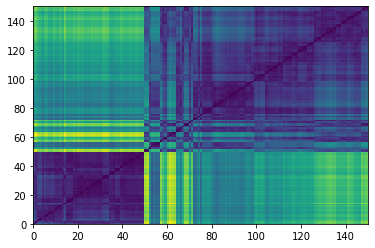

Method:	 average


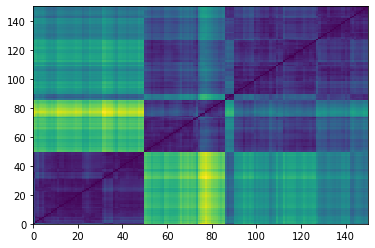

Method:	 complete


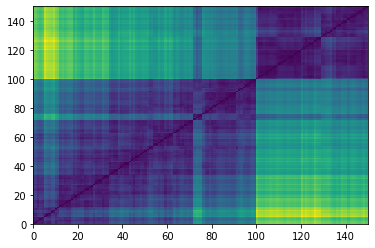

In [7]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = ds.compute_ordering_matrix(dist_mat, method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()